&emsp;이번 포스팅에서는 파이썬 **Dask Array**를 활용한 간단한 예제를 다뤄보도록 하겠습니다.

# 목차

* [Dask Array](#Dask-Array)
* [Dask 클라이언트](#Dask-클라이언트)
* [난수 배열 생성](#난수-배열-생성)
* [메모리에 데이터 유지](#메모리에-데이터-유지)

---

# Dask Array

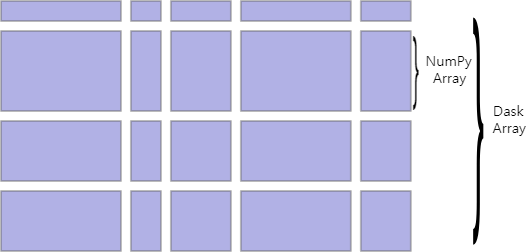

&emsp;Dask array는 위 그림과 같이 NumPy array 덩어리(chunk)가 격자 형태로 배열된 것으로 볼 수 있습니다. Dask array는 Numpy API의 대부분을 지원합니다.

---

# Dask 클라이언트

&emsp;Dask 클라이언트(client)는 필요에 따라 실행해도 되고, 실행하지 않아도 됩니다. Dask 클라이언트는 연산 작업 현황에 대한 정보를 얻는데 유용한 대시보드(dashboard)를 제공합니다.  

&emsp;아래 코드와 같이 클라이언트를 생성하면 대시보드에 대한 링크가 표시됩니다. 이 링크를 클릭해, 작업을 실행하는 동안 다른 화면 한쪽에 대시보드를 열어 두는 것이 좋습니다. 대시보드를 작업 화면과 동시에 보는 것은 분석 및 학습을 수행할 때 매우 유용합니다.

In [1]:
from dask.distributed import Client
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.0.163:8787/status,
Dashboard: http://192.168.0.163:8787/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: False
Comm: inproc://192.168.0.163/17080/1,Workers: 1
Dashboard: http://192.168.0.163:8787/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: inproc://192.168.0.163/17080/4,Total threads: 4
Dashboard: http://192.168.0.163:56766/status,Memory: 1.86 GiB
Nanny: None,


---

# 난수 배열 생성

&emsp;먼저, 아래 코드와 같이 `dask.array.random.random` 메서드를 사용해 10,000×10,000 크기의 난수 배열을 생성합니다. 그리고 설정한 덩어리(chunk)의 크기 1,000×1,000만큼 NumPy 배열로 나눠 생성됩니다. 이 경우 크기가 1,000×1,000인 NumPy 배열 100개(10×10)로 구성됩니다.  

In [2]:
import dask.array as da

x = da.random.random((10000, 10000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

&emsp;NumPy 구문(syntax)을 사용하는 것처럼 Dask Array 객체를 이용할 수 있습니다.  

In [17]:
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z

dask.array<mean_agg-aggregate, shape=(5000,), dtype=float64, chunksize=(500,), chunktype=numpy.ndarray>

&emsp;계산 결과를 NumPy 배열로 얻기를 원한다면 `compute()` 메서드를 호출하면 됩니다. 만약 위에서 `Client()`를 실행한 경우, 연산 중 상태(status) 페이지를 확인할 수 있습니다.  

In [4]:
z.compute()

array([1.00116889, 1.00053386, 1.00955687, ..., 0.99676952, 1.00536909,
       1.00612119])

---

# 메모리에 데이터 유지

&emsp;데이터셋을 임시 저장할만큼 충분한 RAM 메모리가 있는 경우, 데이터를 메모리에 유지하도록 설정할 수 있습니다. 이를 통해, 향후 해당 데이터셋을 사용한 연산의 속도가 훨씬 빨라지는 효과가 있습니다.

In [18]:
# 메모리에 유지하기 전 연산 시간
%time y.sum().compute()

CPU times: total: 2.12 s
Wall time: 701 ms


100000844.21626371

In [19]:
y = y.persist()
y

dask.array<add, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [20]:
# 메모리에 유지한 후 연산 시간
%time y.sum().compute()

CPU times: total: 312 ms
Wall time: 188 ms


100000844.21626371

---